<a href="https://colab.research.google.com/github/Satyake/Getting-Started-with-TF2/blob/main/Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def MakeNoisyData(m,b,n=20):
  x=tf.random.uniform(shape=(n,))
  noise=tf.random.normal(shape=(len(x),),stddev=0.1)
  y=m*x+b+noise
  return x,y

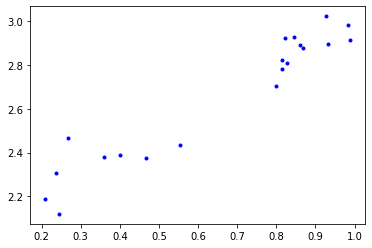

In [4]:
m=1
b=2
x_train,y_train=MakeNoisyData(m,b)
plt.plot(x_train,y_train,'b.')

In [5]:
from tensorflow.keras.layers import Layer

In [9]:
#Define Linear Reg Layer (Layer Subclassing)
class LinearReg(Layer):
  def __init__(self):
    super(LinearReg,self).__init__()
    self.w=self.add_weight(shape=(1,), trainable=True,initializer='random_normal')
    self.b=self.add_weight(shape=(1,),trainable=True,initializer='zeros')

  def call(self,inputs):
    return self.w*inputs+self.b



In [12]:
linear_regression=LinearReg()
print(linear_regression(x_train))

tf.Tensor(
[-0.00058251 -0.00060543 -0.00066349 -0.00059301 -0.0005713  -0.00019103
 -0.00070383 -0.00039574 -0.00070717 -0.00017584 -0.00058859 -0.0006664
 -0.00016873 -0.00015023 -0.00025679 -0.00058319 -0.00033506 -0.00062167
 -0.00028685 -0.00061688], shape=(20,), dtype=float32)


In [13]:
print(linear_regression.weights)

[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.00071591], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [14]:
def squarred_error(y_true,y_pred):
  z=tf.reduce_mean(tf.square(y_true-y_pred))
  return z

In [16]:
starting_loss=squarred_error(linear_regression(x_train),y_train)

In [17]:
starting_loss

<tf.Tensor: shape=(), dtype=float32, numpy=7.1623716>

In [23]:
lr=0.05
steps=25
for i in range(steps):
  with tf.GradientTape() as tape:
    predictions=linear_regression(x_train)
    loss=squarred_error(predictions,y_train)
  gradients=tape.gradient(loss,linear_regression.trainable_variables)
  linear_regression.w.assign_sub(lr*gradients[0])
  linear_regression.b.assign_sub(lr*gradients[1])
  print("steps {} and loss{}".format(i,loss))


steps 0 and loss4.321393013000488
steps 1 and loss3.1580395698547363
steps 2 and loss2.3096728324890137
steps 3 and loss1.6909936666488647
steps 4 and loss1.2398027181625366
steps 5 and loss0.9107441902160645
steps 6 and loss0.6707448363304138
steps 7 and loss0.4956877827644348
steps 8 and loss0.36798685789108276
steps 9 and loss0.274818480014801
steps 10 and loss0.2068316638469696
steps 11 and loss0.15720775723457336
steps 12 and loss0.12097440659999847
steps 13 and loss0.09450587630271912
steps 14 and loss0.07515840232372284
steps 15 and loss0.06100403144955635
steps 16 and loss0.05063697695732117
steps 17 and loss0.04303204268217087
steps 18 and loss0.037441693246364594
steps 19 and loss0.03332090005278587
steps 20 and loss0.030272116884589195
steps 21 and loss0.02800549566745758
steps 22 and loss0.026309698820114136
steps 23 and loss0.025030553340911865
steps 24 and loss0.02405569516122341
